# Preprocessing

In [75]:
import pandas as pd
import nltk
from nltk.corpus.reader import PlaintextCorpusReader
import os

import shutil
path = os.path.abspath("./Corpus")
def mv_file(file_name,folder ):
    print(file_name)
    print(folder)
    shutil.copyfile(path+"/"+file_name,path+"/"+folder+"/"+file_name)

def split_corpus():
    corp = PlaintextCorpusReader("Corpus",".*\.txt")
    for f in corp.fileids():
        if "E" in f:
            mv_file(f,"english")
        else :
            mv_file(f,"arabic")
split_corpus()

D001 A.txt
arabic
D001 E.txt
english
D002 A.txt
arabic
D002 E.txt
english
D003 A.txt
arabic
D003 E.txt
english
D004 A.txt
arabic
D004 E.txt
english
D005 A.txt
arabic
D005 E.txt
english
D006 A.txt
arabic
D006 E.txt
english
D007 A.txt
arabic
D007 E.txt
english
D008 A.txt
arabic
D008 E.txt
english
D009 A.txt
arabic
D009 E.txt
english
D010 A.txt
arabic
D010 E.txt
english
D011 A.txt
arabic
D011 E.txt
english
D012 A.txt
arabic
D012 E.txt
english
D013 A.txt
arabic
D013 E.txt
english
D014 A.txt
arabic
D014 E.txt
english
D015 A.txt
arabic
D015 E.txt
english
D016 A.txt
arabic
D016 E.txt
english
D017 A.txt
arabic
D017 E.txt
english
D018 A.txt
arabic
D018 E.txt
english
D019 A.txt
arabic
D019 E.txt
english
D020 A.txt
arabic
D020 E.txt
english
D021 A.txt
arabic
D021 E.txt
english
D022 A.txt
arabic
D022 E.txt
english
D023 A.txt
arabic
D023 E.txt
english
D024 A.txt
arabic
D024 E.txt
english
D025 A.txt
arabic
D025 E.txt
english
D026 A.txt
arabic
D026 E.txt
english
D027 A.txt
arabic
D027 E.txt
english
D

FileNotFoundError: [Errno 2] No such file or directory: '/home/dex/Documents/uni_projects/mini_projet_RI/Corpus/arabic/arabic/D001 A.txt'

In [9]:


path = os.path.abspath("./Corpus")
import pandas as pd
corp = PlaintextCorpusReader("Corpus/arabic",".*\.txt")
df = pd.DataFrame(corp.fileids())
for f in corp.fileids():
    d = open(path +'/'+f,encoding="windows-1256") 
    l = d.read()
    d.close()
    d = open(path +"/arabic/"+f,encoding="utf-8",mode="w") 
    d.write(l)
    d.close()

# df["q1"] =""
# df["q2"] =""
# df["q3"] =""
# df.to_csv("manual_verification.csv")

In [ ]:

corp = PlaintextCorpusReader("Corpus/english",".*\.txt")
dff = pd.read_csv("manual_verification.csv",index_col="docs")
queries = ["antivirals","arabic","networks"]
dff.index= corp.fileids()
for f in dff.index:
    for q in queries:
        fl = open(path+"/"+f,encoding="windows-1256")
        raw = fl.read()
        fl.close()
        if q in raw.lower():
            dff.at[f,q]="yes"
            dff.at[f,"Auto"]="yes"

dff.to_csv("manual_verification.csv",index_label=["docs"])

In [ ]:
import spacy
from nltk.stem.porter import PorterStemmer
import pandas as pd
from nltk.corpus.reader import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
stemer = PorterStemmer()
corp = PlaintextCorpusReader("Corpus/english",".*\.txt")
# query = stemer.stem("antivirals")
import gensim
queries = ["antivirals","arabic","networks"]
nlp = spacy.load('en_core_web_md')

qdict = {q : [] for q in queries}
import re
cpt = 0
for f in corp.fileids():
    raw = corp.raw(f)
    tokens = word_tokenize(raw)
    # tokens = [stemer.stem(w) for w in tokens]
    for q in queries:
        query = nlp(q)
        for w in tokens:
            pen= nlp(w)
            sim = query.similarity(pen)
            if sim >0.8:
                qdict[q].append(f)
                break
df = pd.DataFrame(qdict) 
df.to_csv("simVerification.csv")


2022-12-14 16:15:43.527727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 16:15:44.041055: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-14 16:15:45.485863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/dex/miniconda3/lib/
2022-12-14 16:15:45.486378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: can

KeyboardInterrupt: 

In [ ]:
net = nlp("communications")
comm = nlp("network")
net.similarity(comm)

0.6974073312307141

In [ ]:
import pandas as pd 

df =pd.read_csv("simVladiation.csv")
ar = df["anitviral"]
ar[0].split(",")


['D010 E.txt',
 'D131 E.txt',
 'D333 E.txt',
 'D337 E.txt',
 'D628 E.txt',
 'D631 E.txt']

In [ ]:
import camelot
tables = camelot.read_pdf("Collection (Doc Title List).pdf",encoding="utf-8")
print(tables[0].df)

In [ ]:
# for i,row in tables[0].df.iterrows():
#     print(row[1][::-1])
df  = tables[0].df
print(df[1][2])
# df[:][2] = df[:][0][::-1]
# tables[0].df.to_csv("dsf.csv")
print(df)

## Indexing

In [ ]:
## whoosh Initialization function
def init_index():
    pass

### Search Engine Class

In [1]:
from typing import Dict, List, Sequence

from whoosh.index import create_in
from whoosh import index
from whoosh.fields import *
from whoosh.qparser import MultifieldParser,QueryParser
from whoosh.filedb.filestore import RamStorage
from whoosh.analysis import StemmingAnalyzer
from whoosh import scoring
from nltk.stem.isri import ISRIStemmer
from nltk.stem.snowball import SnowballStemmer
from whoosh.query import Query
from nltk.corpus.reader import PlaintextCorpusReader
import json
import pandas as pd
import os


In [2]:

# stemmer = ISRIStemmer()
stemmer = SnowballStemmer(language="arabic")


In [3]:

class SearchEngine:

    def __init__(self, schema:Schema,index_dir="index_dir"):
        self.schema = schema
        self.index_dir = index_dir
        self.is_indexed = False
        schema.add('raw', TEXT(stored=True))
        if not os.path.exists(self.index_dir):
            os.mkdir(self.index_dir)
            self.ix = index.create_in(self.index_dir,self.schema)
            self.ix = index.open_dir(self.index_dir)
        else:
            if len(os.listdir(self.index_dir)) != 0:
                self.ix = index.open_dir(self.index_dir)
                self.is_indexed= True
            else :
                self.ix = index.create_in(self.index_dir,self.schema)

    def close_index(self):
        self.ix.close()
    def index_doc(self,title,content,path):
        writer = self.ix.writer()
        writer.add_document(title=title,content=content,path=path)
        writer.commit(optimize=True)

    def index_documents(self, docs: Sequence):
        writer = self.ix.writer()
        for doc in docs:
            d = {k: v for k,v in doc.items() if k in self.schema.stored_names()}
            d['raw'] = json.dumps(doc) # raw version of all of doc
            writer.add_document(**d)
        writer.commit(optimize=True)
    def index_docs_from_corpus(self,corpus_dir="Corpus/arabic",titles_path=None):
        if self.is_indexed:
            return
        titles = None
        if titles_path != None:
            titles = pd.read_csv(titles_path)
            titles = titles.set_index("Id-Doc")
            titles.index = titles.index.map(str)
        corpus = PlaintextCorpusReader(corpus_dir,".*\.txt")
        writer = self.ix.writer()
        for f in corpus.fileids():
            title=None
            if type(titles) != None :
                t = str(f).split(" ")[0]
                title = titles.loc[t,"ArabicTitle"]
     
            raw = corpus.raw(f)
            
            writer.add_document(path=t,content=raw,title=title)
        writer.commit(optimize=True)
    def get_index_size(self) -> int:
        self.ix.reader()
        return self.ix.doc_count_all()

    def query(self, q: str,  highlight: bool=True,limit=10,scoring=scoring.BM25F) -> List[Dict]:
        search_results = []
        from whoosh.qparser import QueryParser

        qp = MultifieldParser(["content","title"], schema=self.schema)
        q = qp.parse(q)
        d={}
        with self.ix.searcher(weighting =scoring) as searcher:
            results = searcher.search(q,limit=limit)
            print(searcher.weighting)
            for r in results:
                fields =r.fields()
                d[fields["path"]] =fields
                d[fields["path"]]["score"] = r.score
                # d = json.loads(r)
                # if highlight:
                #         if r[f] and isinstance(r, str):
                #             d[f] = r.highlights(f) or r
                # search_results.append(r)
        # print(search_results)
        return d 

if __name__ == '__main__':


    schema = Schema(
        path=ID(stored=True,unique=True),
        title=TEXT(stored=True,analyzer=StemmingAnalyzer(stemfn=stemmer.stem)),
        content=TEXT(stored=True, analyzer=StemmingAnalyzer(stemfn=stemmer.stem)),
        # title=TEXT(stored=True),
        # description=TEXT(stored=True ),
        tags=KEYWORD(stored=True)
    )

    engine = SearchEngine(schema)
    # engine.index_documents(docs)
    engine.index_docs_from_corpus(titles_path="Titles.csv")
    print(f"indexed {engine.get_index_size()} documents")


indexed 632 documents


In [4]:
import json 
import pandas as pd
with open("simval.json") as f:
    simval = json.loads(f.read())
    


In [5]:
net = stemmer.stem("شبكات")
antiv = stemmer.stem("أجسام OR مضادة  OR فيروسات")
arabic = stemmer.stem("اللغة OR عربية")
wr_req = [arabic,net,antiv]


In [25]:
arb_syn1 = [["لغة","كلام","لسان","اللغة","لغة طبيعية","عملية لغوية"],["عربية","عربي","عرب"]]
arb_syn1 = " OR ".join([" OR ".join(w) for w in arb_syn1])
net_syn1= ["شبكة","شبكات"]
net_syn1= " OR ".join(net_syn1)
print(arb_syn1)
print(net_syn1)
# net_syn1= stemmer.stem(net_syn1)
# arb_syn1 = stemmer.stem(arb_syn1)
arb_syn1  += " OR لغة "
arb_syn1  += " OR العربية"
antiv_syn1 = [["شيء","جسم فيزيائي","بدن","جسم","اجسام","جسد","جرم"],["مضاد","مضادة","مستضد"],["فيروس"]]
# antv_syn1="(كلام OR عربي) OR(لغة OR عربي)  OR(لغة  طبيعية  OR عربي)OR ( كلام OR عربية)  OR( لغة OR عربية)  OR(لغة طبيعية OR  عربية)OR (كلام  OR عرب)OR (لغة OR عرب)OR  (لغة طبيعية OR عرب)"
antv_syn1 = " OR ".join([" OR ".join(w) for w in antiv_syn1[::-1]])

print("\t",antv_syn1)
# antv_syn1=stemmer.stem(antv_syn1)
ar_req =[arb_syn1,net_syn1,antv_syn1]

لغة OR كلام OR لسان OR اللغة OR لغة طبيعية OR عملية لغوية OR عربية OR عربي OR عرب
شبكة OR شبكات
	 فيروس OR مضاد OR مضادة OR مستضد OR شيء OR جسم فيزيائي OR بدن OR جسم OR اجسام OR جسد OR جرم


In [ ]:
كلام  لغة  لغة طبيعية  عربية  عربي  عرب      شبكة  شبكات      فيروس  مضاد  مضادة  مستضد  جسم  اجسام

In [26]:

arb_syn2 = [["كلام","لغة","لغة طبيعية"],["عربية","عربي","عرب"]]
net_syn2= ["شبكة","شبكات"]
antv_syn2 = [["جسم","اجسام"],["مضاد","مضادة","مستضد"],["فيروس"]]

net_syn2= " OR ".join(net_syn2)
arb_syn2 = " OR ".join([" OR ".join(w) for w in arb_syn2])
antv_syn2 = " OR ".join([" OR ".join(w) for w in antv_syn2[::-1]])

# antv_syn2=stemmer.stem(antv_syn2)
# net_syn2= stemmer.stem(net_syn2)
# arb_syn2 = stemmer.stem(arb_syn2)
aruv_req = [arb_syn2,net_syn2,antv_syn2]
print(aruv_req)

['كلام OR لغة OR لغة طبيعية OR عربية OR عربي OR عرب', 'شبكة OR شبكات', 'فيروس OR مضاد OR مضادة OR مستضد OR جسم OR اجسام']


In [20]:
pd.set_option('float_format', '{:.3f}'.format)
# pd.set_option('precision', 2)

qries = [wr_req,ar_req,aruv_req]
queries = ["arabic","network","antiviral"]
scorings ={"bm25": scoring.BM25F,"pl2":scoring.PL2}
for k,qs in enumerate(qries):
    for sk,sv in scorings.items():
        for i,q in enumerate(qs):
            print(f"Query:: {q}")
            print(len(simval[queries[i]]))
            res = engine.query(q,  highlight=True,limit=1000,scoring=sv)
            req_df = pd.DataFrame(columns=["document","relevant","recall","precision",])
            
            cpt_rec = 0
            cpt_prec= 0

            f_ids= [str(k).split(" ")[0] for k,v in res.items()]
            for j,f in enumerate(f_ids):
                if f in simval[queries[i]]:
                    cpt_rec +=1
                    req_df.at[j,"relevant"] = True
                else:
                    req_df.at[j,"relevant"] = False
                req_df.at[j,"document"] = f
                req_df.at[j,"recall"] = cpt_rec/len(simval[queries[i]])
                req_df.at[j,"precision"] =  cpt_rec/(j+1)
                req_df.at[j,"f-measure"] =  2 *req_df.at[j,"precision"] *req_df.at[j,"recall"]/ (req_df.at[j,"precision"] +req_df.at[j,"recall"])

            f_ids= [k for k,v in res.items()]
            rel = [v for v in f_ids if v in simval[queries[i]]]

            print("\t", len(rel))
            req_df = req_df.round({"recall":3,"precision":3,"f-measure":3}) 
            req_df = req_df.round(3) 
            # req_df.apply(lambda x: np.round(x, decimals=3))
            req_df["precision"] = req_df["precision"].astype(float).round(3)
            req_df["recall"] = req_df["recall"].astype(float).round(3)

            req_df["precision"] = req_df["precision"].astype(float).round(3)
            req_df.to_csv("prcsv/"+sk+"/"+queries[i]+"/"+queries[i]+str(k)+f"_{sk}"+".csv")
            reqint_df = pd.DataFrame(columns=["recall","precision"])
            import numpy as np
            rec = np.arange(0,1.1,0.1)
            rec = np.round(rec,3)
            # print(req_df["recall"])
            prev_prec =0
            h =0
            for j,r  in enumerate(rec):
                reqint_df.at[j,"recall"] = r
                h=0
                for ind, row in req_df.iterrows():
                    if row["recall"] >=r and row["relevant"] ==True:
                        if row["document"] == "D631" and row["recall"]==0.6 :
                            print(row)
                        if row["precision"]>h:
                            h=row["precision"]
                    
                # h = req_df.loc[req_df["recall"]>=r]["precision"].max()
                # import math
                # if math.isnan(h):
                #     h = 0
                reqint_df.at[j,"precision"] = h
                prev_prec = reqint_df.at[j,"precision"]

            reqint_df["precision"] = reqint_df["precision"].astype(float).round(3)
            reqint_df["recall"] = reqint_df["recall"].astype(float).round(3)
            reqint_df.to_csv("prcsv/"+sk+"/"+queries[i]+"/"+queries[i]+str(k)+f'{sk}'+"_int.csv")
            print("-"*70)

Query:: لغة OR عرب
13
	 13
----------------------------------------------------------------------
Query:: شبك
65
	 62
----------------------------------------------------------------------
Query:: اجسام OR مضادة  OR فيروس
5
	 3
document     D631
relevant     True
recall      0.600
precision   0.375
f-measure   0.462
Name: 7, dtype: object
document     D631
relevant     True
recall      0.600
precision   0.375
f-measure   0.462
Name: 7, dtype: object
document     D631
relevant     True
recall      0.600
precision   0.375
f-measure   0.462
Name: 7, dtype: object
document     D631
relevant     True
recall      0.600
precision   0.375
f-measure   0.462
Name: 7, dtype: object
document     D631
relevant     True
recall      0.600
precision   0.375
f-measure   0.462
Name: 7, dtype: object
document     D631
relevant     True
recall      0.600
precision   0.375
f-measure   0.462
Name: 7, dtype: object
document     D631
relevant     True
recall      0.600
precision   0.375
f-measure   0.462
Name

In [9]:

from nltk.corpus import wordnet as wn
w = wn.synsets("جسم",lang="arb")
print(w)

[Synset('relieve.v.01'), Synset('visualize.v.01'), Synset('salvage.v.01'), Synset('stick_out.v.01')]


------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------

/tmp/ipykernel_6277/3989838687.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------

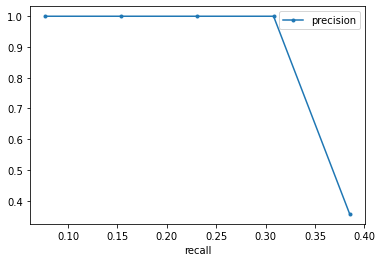

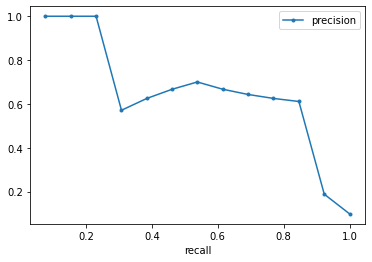

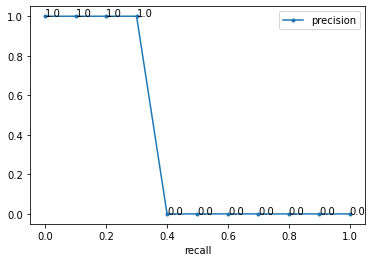

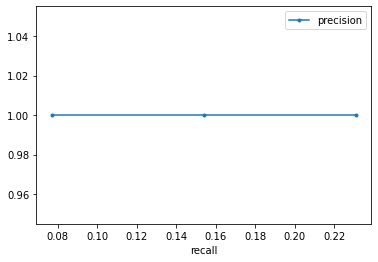

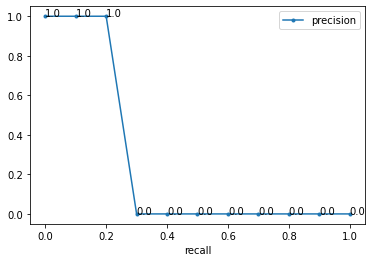

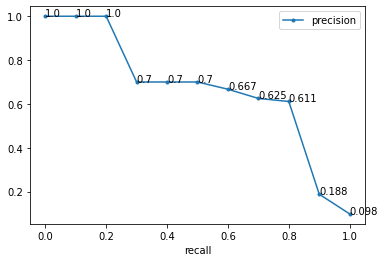

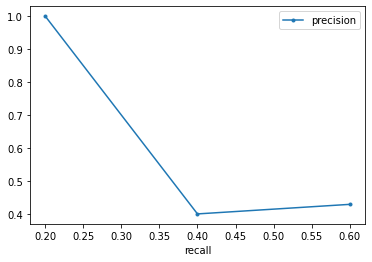

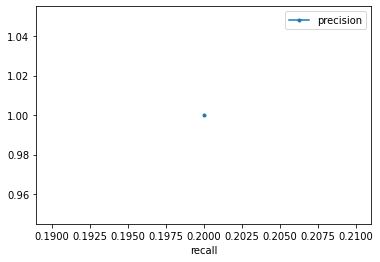

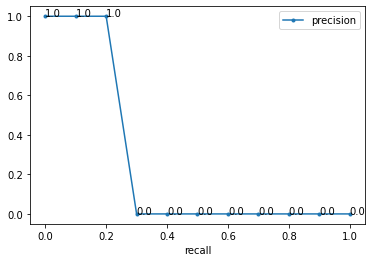

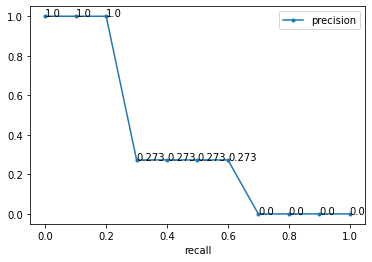

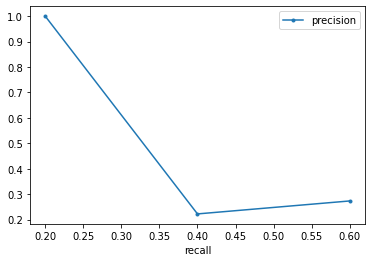

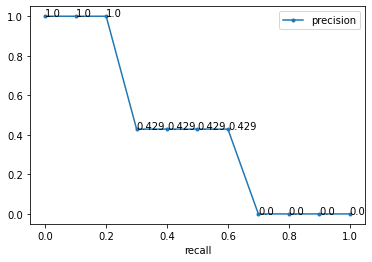

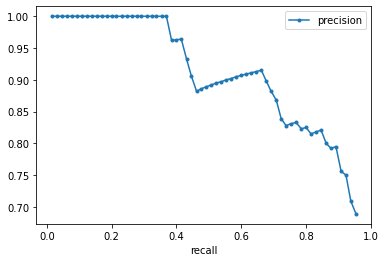

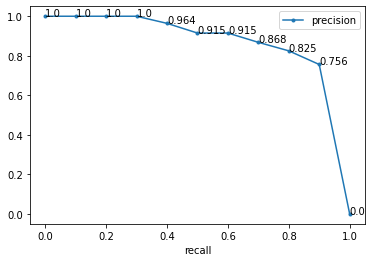

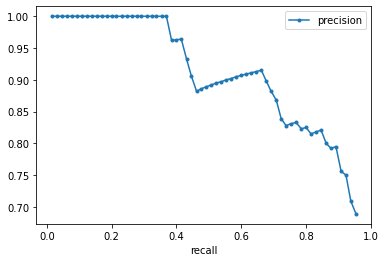

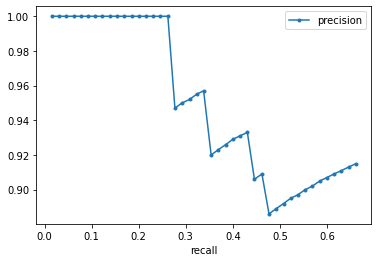

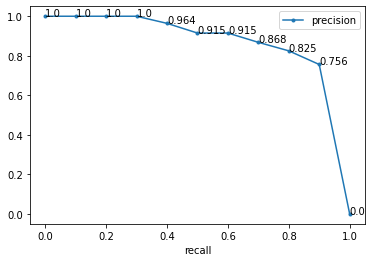

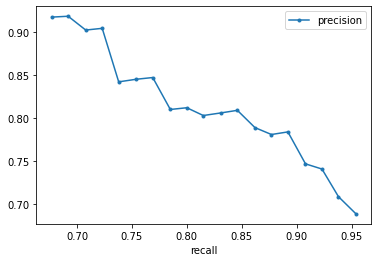

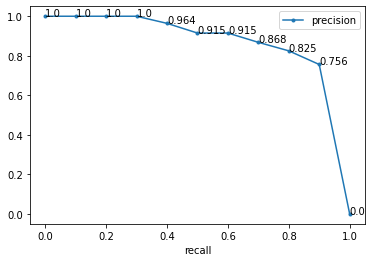

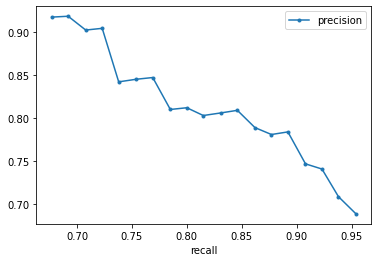

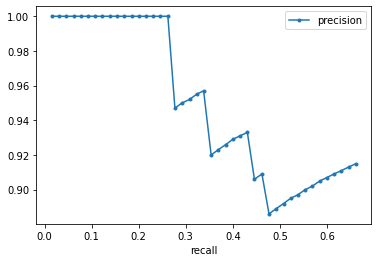

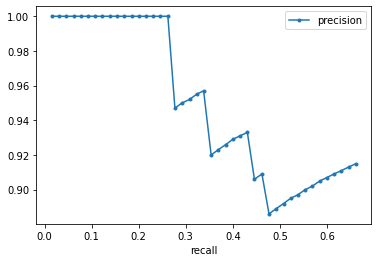

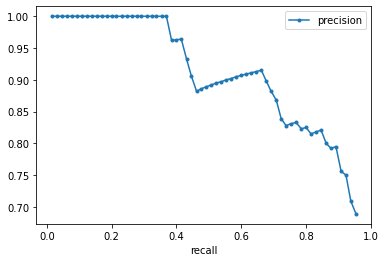

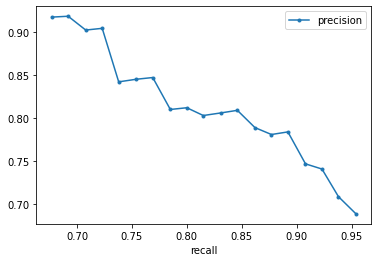

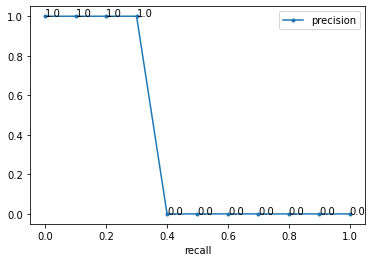

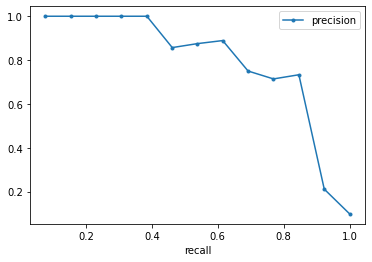

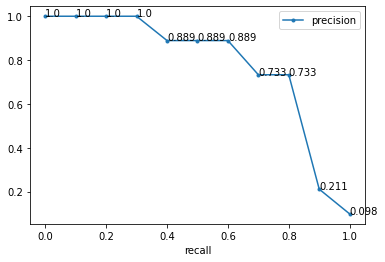

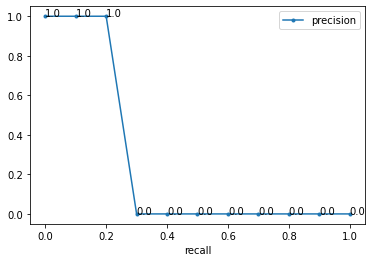

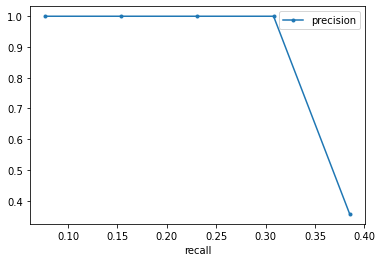

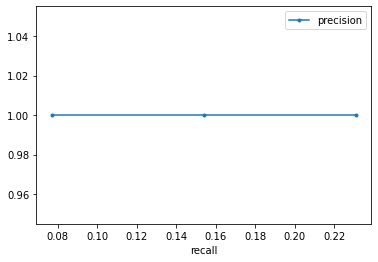

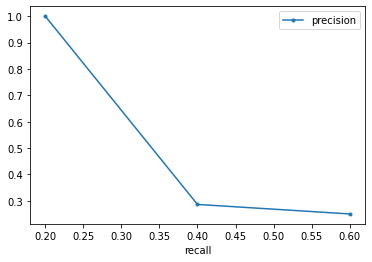

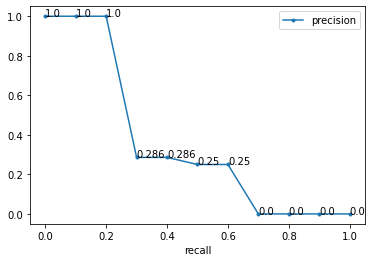

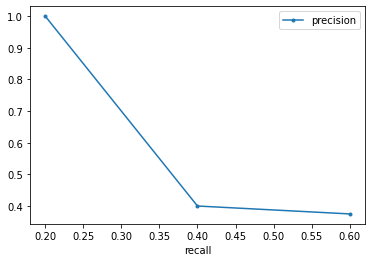

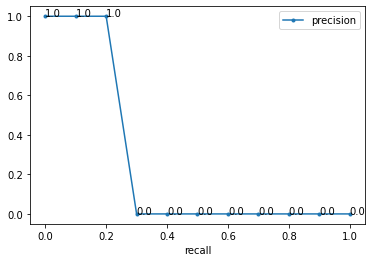

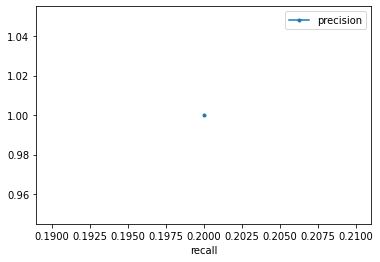

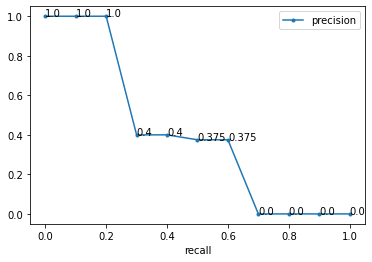

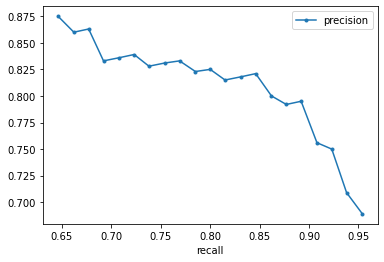

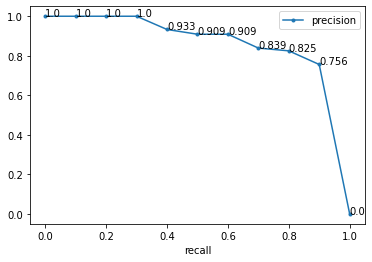

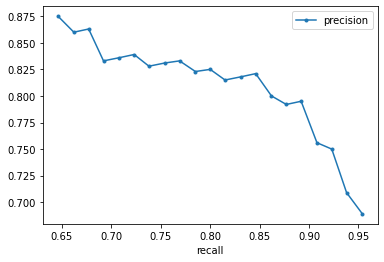

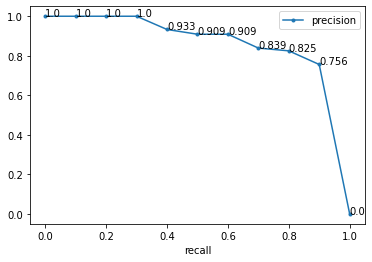

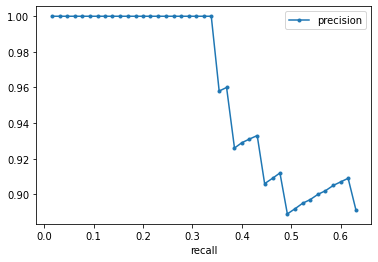

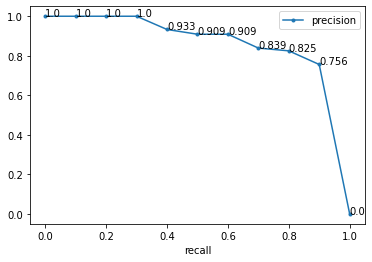

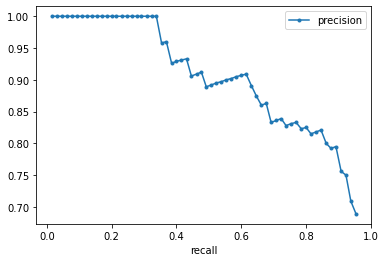

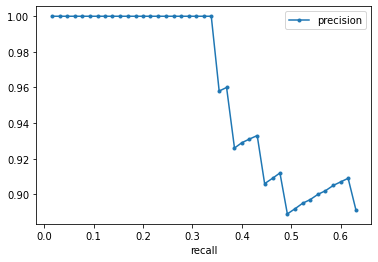

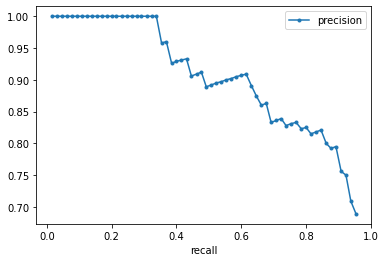

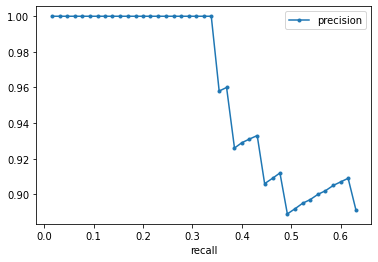

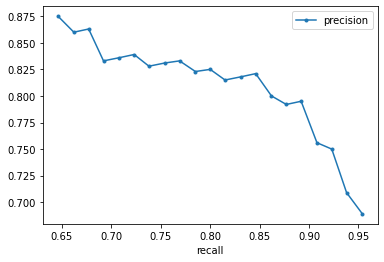

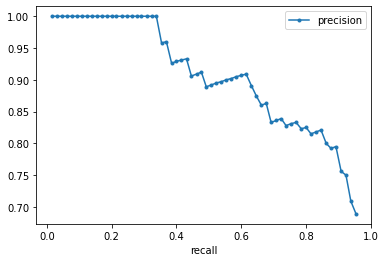

In [22]:
from matplotlib import pyplot as plt
import pandas as pd
import json
scrs = os.listdir("prcsv")
avgprecs= {}
for sc in scrs :

    qrs = os.listdir(f"prcsv/{sc}")
    avgprecs[sc]= {}
    for q in qrs:
        csvs = os.listdir(f"prcsv/{sc}/{q}")
        avgprecs[sc][q] ={}
        for f_csv in csvs:
            
            fig, ax = plt.subplots()
            df = pd.read_csv(f"prcsv/{sc}/{q}/{f_csv}")
            if "_int" not in f_csv:
                df = df.loc[df["relevant"] ==True].round(3)

                avgprc = df["precision"].mean()
                # avgprecs[f_csv] =avgprc
                avgprc = round(avgprc,3)
                avgprecs[sc][q][f_csv] =avgprc
                # part_df.plot(x="recall",y="precision",title=f_csv)
                # print(f_csv,"\t",avgprc)
                
                print("-"*60)
            else :
                avgprc = df["precision"].round(3).mean()
                avgprc = round(avgprc,3)
                avgprecs[sc][q][f_csv] =avgprc
                
                # avgprecs[f_csv] =avgprc
                # print(f_csv,"\t",avgprc)
                for k,v in df.iterrows():
                    ax.text(v["recall"],v["precision"],v["precision"])
                print("-"*60)

            ax = df.plot(x="recall",y="precision",style='.-',ax=ax)
            plt.savefig(f"plots/{sc}/{q}/{f_csv}"+".png",dpi=400)
            
            
with open("avgprcs.json","w") as f:
    f.write(json.dumps(avgprecs))


    

In [53]:
path="tables/int"
dfs = os.listdir(path)
for f in dfs:
    df = pd.read_csv(path+"/"+f,header="infer")
    df = df.set_index("recall")
    dff["recall"] =df["recall"]
    print(df)
    dff["BM25_1"] += df.at[0,"BM25_1"]
dff

KeyError: 'recall'